In [31]:
import pandas as pd 
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt 
import gmaps

#api imports
import requests, json
api_key = "gkey"

# Configure gmaps
gmaps.configure(api_key=api_key)


In [32]:
data_file = "data/time_series_covid_19_recovered.csv"
recover_df = pd.read_csv(data_file)

In [33]:
china_df = recover_df.loc[(recover_df["Country/Region"] == "Mainland China"), :]

In [34]:
china_df["January"] = china_df["1/31/20"]

C:\Users\garrettw13\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
china_df["February"] = china_df["2/20/20"]

C:\Users\garrettw13\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
china_df["Test"] = china_df["February"] - china_df["January"]

C:\Users\garrettw13\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
china_df = china_df.rename(columns = {"February":"Total","Test":"February"})

C:\Users\garrettw13\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


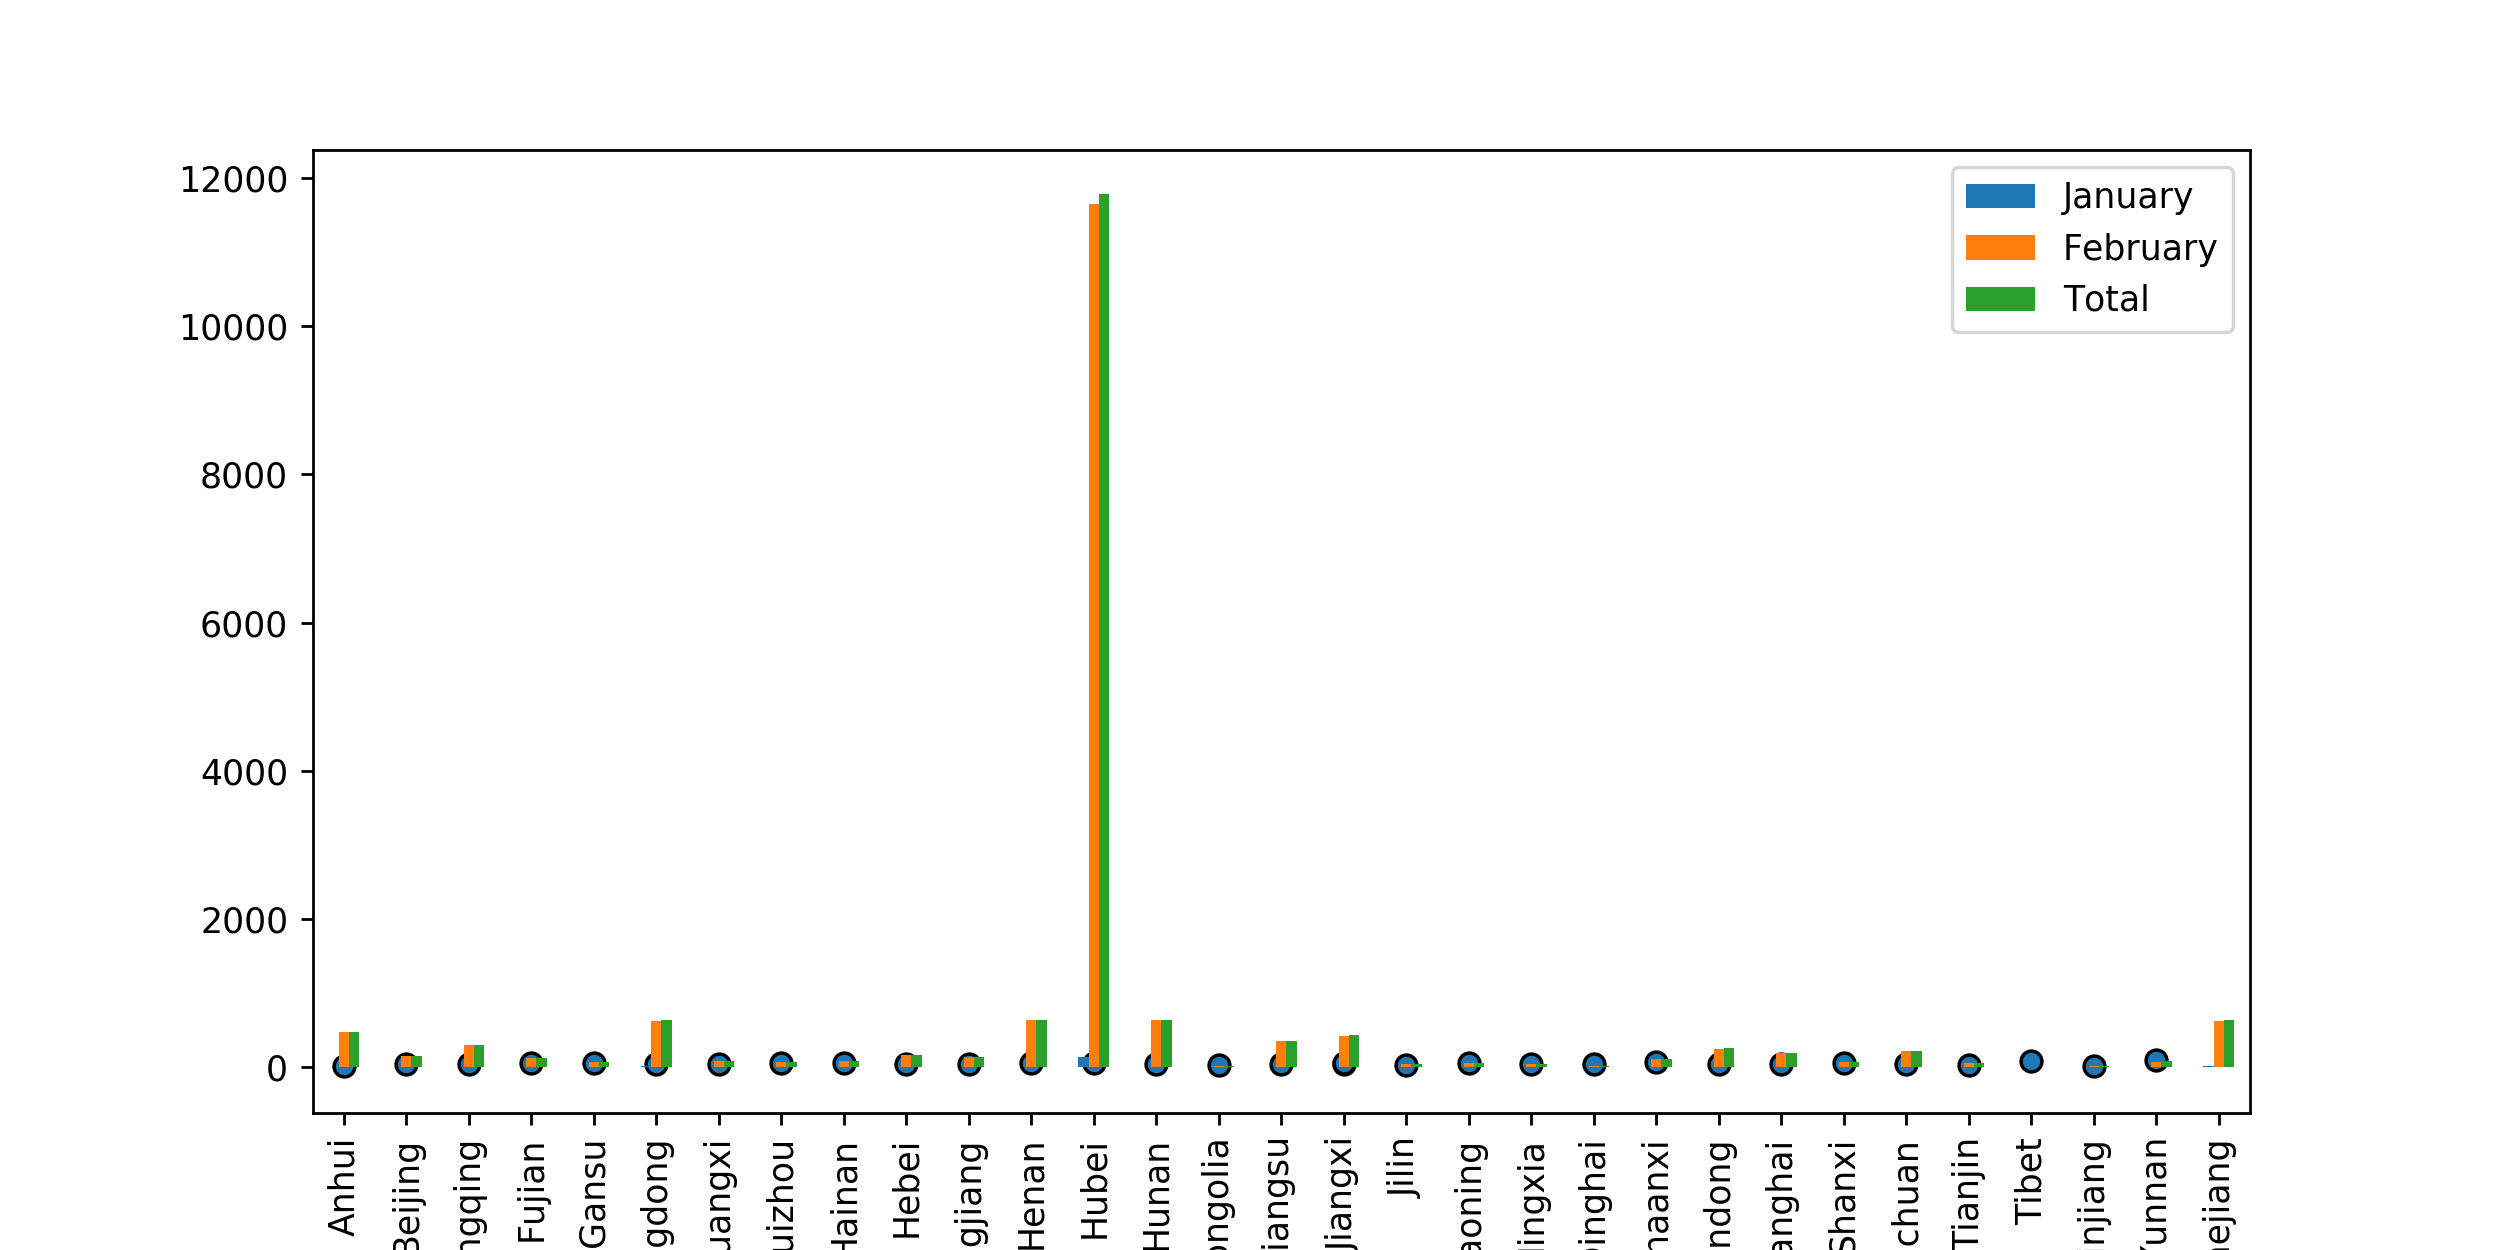

In [38]:
grouped_city = china_df.groupby(["Province/State"])["January","February","Total"].sum()
grouped_city
multi_plot = grouped_city.plot(kind="bar", figsize=(10,5)) 

In [39]:
# # url variable store url 
# url = "https://maps.googleapis.com/maps/api/place/textsearch/json?"

# # The text string on which to search 
# query = input('Search query: ')

# # get method of requests module 
# # return response object 
# r = requests.get(url + 'query=' + query +
#                         '&key=' + api_key) 

# # json method of response object convert 
# #  json format data into python format data 
# x = r.json() 

# # now x contains list of nested dictionaries 
# # we know dictionary contain key value pair 
# # store the value of result key in variable y 
# y = x['results'] 

# # keep looping upto length of y 
# #for i in range(len(y)): 
      
#     # Print value corresponding to the 
#     # 'name' key at the ith index of y 
#     print(y[i]['name']) 
    
    

In [40]:
china_df.columns
china_reduced = china_df[['Province/State','Lat','Long', 'Total']]
china_reduced['Hospital Count'] = ''
china_reduced = china_reduced.sort_values('Total', ascending=False)
china_reduced

china_top_5 = china_reduced.head()
china_top_5
china_reduced

C:\Users\garrettw13\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Province/State,Lat,Long,Total,Hospital Count
12,Hubei,30.97564,112.27070,11788,
5,Guangdong,23.33841,113.42200,642,
11,Henan,33.88202,113.61400,637,
13,Hunan,27.61041,111.70880,634,
30,Zhejiang,29.18251,120.09850,633,
0,Anhui,31.82571,117.22640,474,
16,Jiangxi,27.61401,115.72210,433,
15,Jiangsu,32.97027,119.46400,356,
2,Chongqing,30.05718,107.87400,299,
22,Shandong,36.34377,118.15290,254,


In [41]:

# Store latitude and longitude in locations
locations = china_df[["Lat", "Long"]]
# Fill NaN values and convert to float
Total = china_df["Total"]

In [42]:
fig = gmaps.figure(map_type="HYBRID")
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=Total, 
                                 dissipating=False, max_intensity=500,
                                 point_radius=1)
#plot the figure on gmaps
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
china_df.columns
china_reduced = 

SyntaxError: invalid syntax (<ipython-input-43-c199b6a68134>, line 2)

In [44]:
#using iterrows to iterate through hotels_df dataframe
#for index, row in hotel_df.iterrows():


rowlat = 40.18238
rowlng = 116.41420
location = str(rowlat)+","+ str(rowlng)
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
params = {"location": {location},"radius":1600 ,"type": "hospital","key": api_key}
#print(params)
# assemble url and make API request
#print(f"Retrieving Results for Index {index}: {location}.")
response = requests.get(base_url, params=params).json()
count_results = len(response['results'])
#next_token = response['next_page_token']
count_results
# base_url2 = maps.googleapis.com/maps/api/place/nearbysearch/json?pagetoken=
# response_2 = 

# maps.googleapis.com/maps/api/place/nearbysearch/json?pagetoken=

    # extract results
    #results = response['results']
#     try:
#             print(f"Closest hotel is {results[0]['name']}.")
#             #storing results in Hotel column in df
#             hotel_df.loc[index, 'Hotel Name'] = response['results'][0]['name']
#     except (KeyError, IndexError):
#         print("Missing field/result... skipping.")
#         print("------------")

4

In [65]:
gdp_df = pd.read_csv("data/gdp_refined.csv")
gdp_df['GDP'] = gdp_df['GDP'].astype(float)

ValueError: could not convert string to float: '10,054'

In [63]:
gdp_df = gdp_df.sort_values(by=['Percentage Recovery(%)'], ascending=True)
gdp_df

,Province/State,Total Number of Recoveries,Total Confirmed Cases,Percentage Recovery(%),GDP
0,Hubei,11788,62442,18.88,"10,054"
29,Inner Mongolia,16,75,21.33,"10,311"
14,Heilongjiang,136,476,28.57,"6,553"
27,Xinjiang,22,76,28.95,"7,413"
17,Guangxi,90,245,36.73,"6,244"
13,Beijing,153,395,38.73,"21,269"
10,Sichuan,217,520,41.73,"7,370"
15,Fujian,126,293,43.00,"13,729"
23,Tianjin,59,131,45.04,"18,226"
19,Yunnan,79,174,45.40,"5,595"


<IPython.core.display.Javascript object>


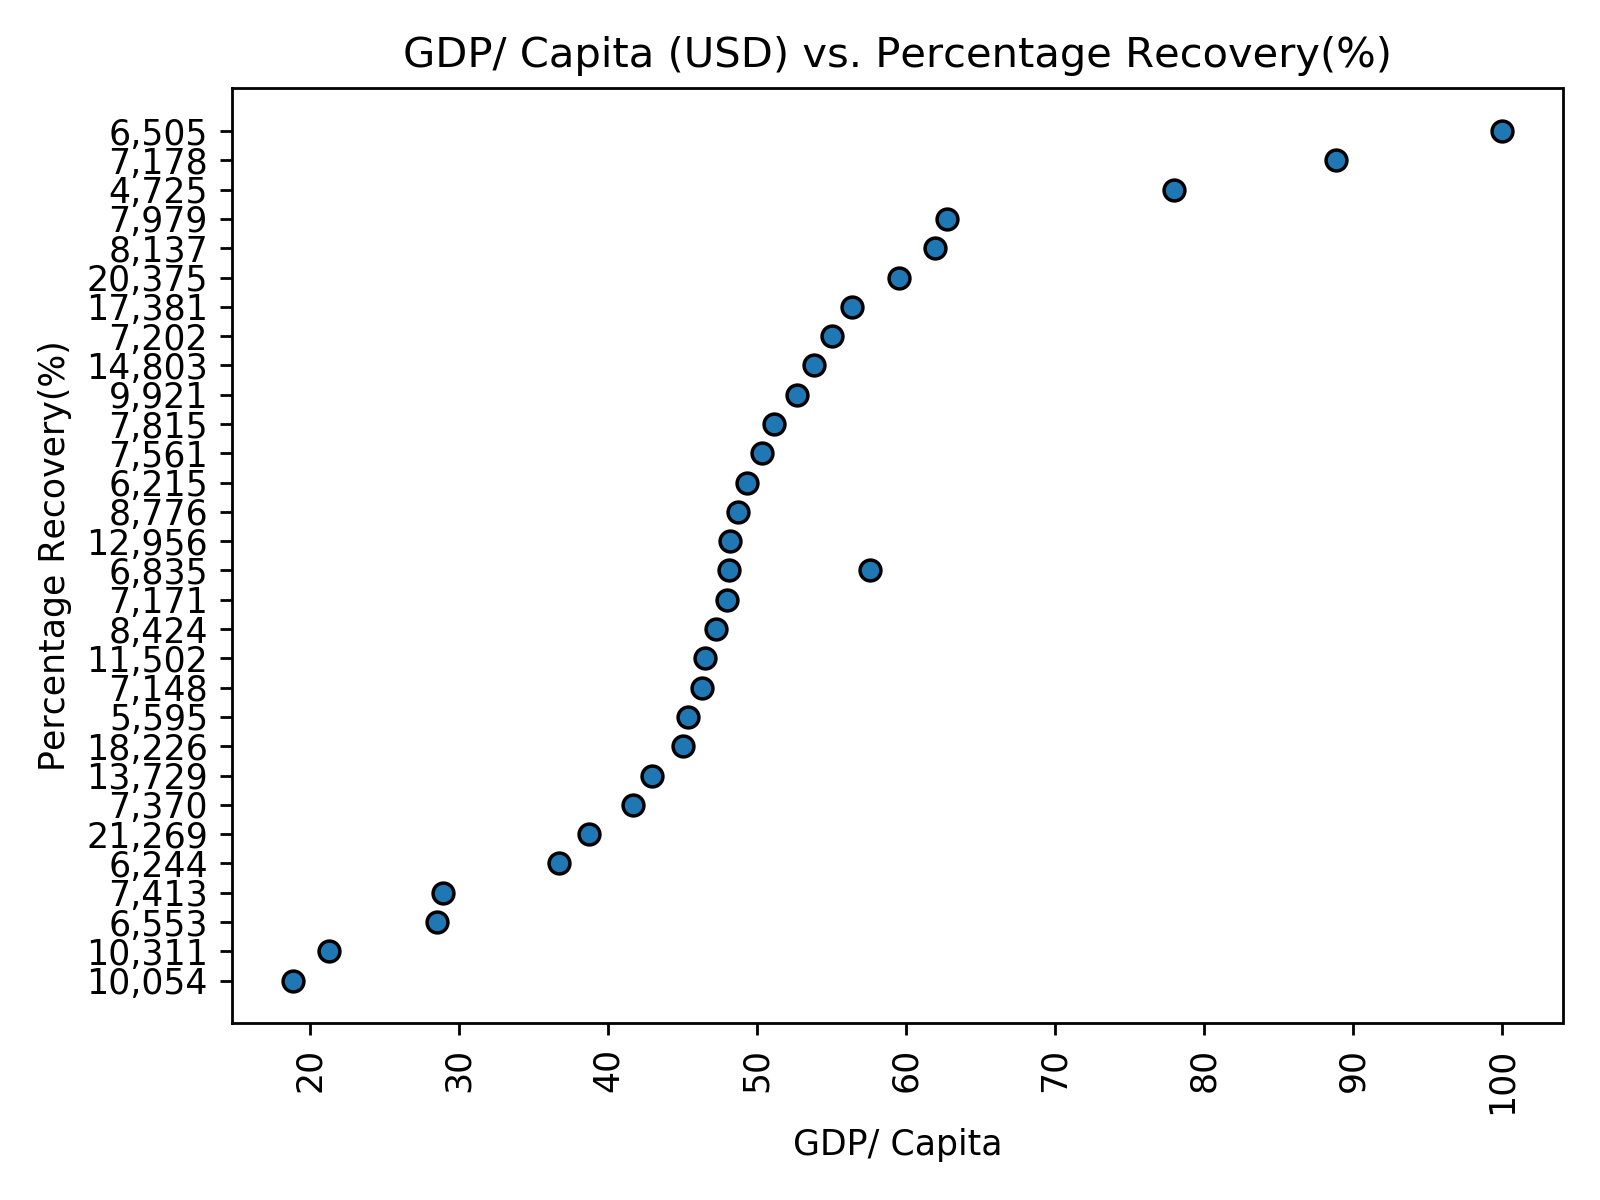

In [64]:
plt.scatter(gdp_df['Percentage Recovery(%)'], gdp_df['GDP'], edgecolors='black')
plt.xlabel("GDP/ Capita")
plt.ylabel("Percentage Recovery(%)")
plt.title("GDP/ Capita (USD) vs. Percentage Recovery(%)")
plt.xticks(rotation=90)
plt.tight_layout()